In [1]:
import pandas as pd
import numpy as np
import random
import os
from sklearn.manifold import TSNE

In [2]:
W_LIST_LEFT_HAND = [
        "l_w",
        "l_t_c",
        "l_t_m",
        "l_t_i",
        "l_t_t",
        "l_i_m",
        "l_i_p",
        "l_i_d",
        "l_i_t",
        "l_m_m",
        "l_m_p",
        "l_m_d",
        "l_m_t",
        "l_r_m",
        "l_r_p",
        "l_r_d",
        "l_r_t",
        "l_p_m",
        "l_p_p",
        "l_p_d",
        "l_p_t",
    ]

W_LIST_RIGHT_HAND = [
        "r_w",
        "r_t_c",
        "r_t_m",
        "r_t_i",
        "r_t_t",
        "r_i_m",
        "r_i_p",
        "r_i_d",
        "r_i_t",
        "r_m_m",
        "r_m_p",
        "r_m_d",
        "r_m_t",
        "r_r_m",
        "r_r_p",
        "r_r_d",
        "r_r_t",
        "r_p_m",
        "r_p_p",
        "r_p_d",
        "r_p_t",
    ]

W_LIST_POSE = [
        "n", 
        "lei", 
        "le", 
        "leo", 
        "rei",
        "re",
        "reo",
        "lea",
        "rea",
        "ml",
        "mr",
        "ls",
        "rs",
        "lel",
        "rel",
        "lw",
        "rw",
        "lp",
        "rp",
        "li",
        "ri",
        "lt",
        "rt",
        "lh",
        "rh",
        "lk",
        "rk",
        "la",
        "ra",
        "lhe",
        "rhe",
        "lf",
        "rf"
    ]

In [3]:
np.random.seed(5566)
random.seed(5566)

In [4]:
data_path = "..\\data\\actions"

In [5]:
model_target = "actions"

if model_target == "actions":
    #actions = ["lift", "punch", "trample", "sit", "jump", "run", "walk", "fists_waist", "point_left", "point_right", "stand"]
    actions = ["sit", "jump", "walk", "fists_waist", "point_left", "point_right", "stand"]
    target_columns = [key + "_x" for key in W_LIST_RIGHT_HAND] + [key + "_y" for key in W_LIST_RIGHT_HAND]
    target_columns += [key + "_x" for key in W_LIST_LEFT_HAND] + [key + "_y" for key in W_LIST_LEFT_HAND]
    target_columns += [key + "_x" for key in W_LIST_POSE] + [key + "_y" for key in W_LIST_POSE]
    target_columns_x = target_columns.copy()
    target_columns += ["image_name", "label"]
elif model_target == "gestures":
    actions = ["zero", "one", "two", "three", "view_left", "view_right", "gesture_none"]
    target_columns = [key + "_x" for key in W_LIST_RIGHT_HAND] + [key + "_y" for key in W_LIST_RIGHT_HAND]
    target_columns += [key + "_x" for key in W_LIST_LEFT_HAND] + [key + "_y" for key in W_LIST_LEFT_HAND]
    target_columns_x = target_columns.copy()
    target_columns += ["image_name", "label"]
else:
    RunTimeError("???")

dfs = []
for idx, action in enumerate(actions):
    file_path = os.path.join(data_path, action, "data.csv")
    df = pd.read_csv(file_path)

    df.label = idx
    dfs.append(df)

In [6]:
df_train = pd.concat(dfs)
df_train.reset_index(drop=True)
df_train = df_train.fillna(0)
df_train

,n_x,n_y,n_v,lei_x,lei_y,lei_v,le_x,le_y,le_v,leo_x,...,r_p_p_y,r_p_p_v,r_p_d_x,r_p_d_y,r_p_d_v,r_p_t_x,r_p_t_y,r_p_t_v,image_name,label
0,0.497619,0.835544,0.999985,0.513461,0.895894,0.999972,0.527716,0.893080,0.999964,0.539836,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1625133857764.png,0
1,0.498308,0.827892,0.999986,0.514931,0.886886,0.999975,0.528617,0.883418,0.999968,0.540825,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1625133858108.png,0
2,0.498347,0.831152,0.999987,0.515255,0.890861,0.999977,0.528834,0.887758,0.999971,0.540993,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1625133858439.png,0
3,0.498357,0.834090,0.999988,0.515388,0.894077,0.999979,0.528928,0.890973,0.999973,0.541076,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1625133858780.png,0
4,0.498231,0.847810,0.999989,0.515291,0.908462,0.999981,0.528828,0.905366,0.999976,0.540910,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1625133859171.png,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.574802,0.819904,0.999909,0.583324,0.838455,0.999885,0.589943,0.835614,0.999797,0.595748,...,0.078302,0.0,0.436251,0.058796,0.0,0.442873,0.048698,0.0,1625133827653.png,6
87,0.570066,0.819152,0.999912,0.580636,0.837004,0.999889,0.586680,0.834420,0.999804,0.592964,...,0.083313,0.0,0.433662,0.063859,0.0,0.440520,0.054072,0.0,1625133827980.png,6
88,0.567490,0.823090,0.999918,0.578475,0.840621,0.999897,0.584714,0.837828,0.999817,0.591197,...,0.082419,0.0,0.428797,0.063617,0.0,0.435538,0.054087,0.0,1625133828306.png,6
89,0.562547,0.833139,0.999922,0.573187,0.851168,0.999900,0.579543,0.847555,0.999823,0.586012,...,0.077204,0.0,0.415130,0.057551,0.0,0.420348,0.045033,0.0,1625133828639.png,6


In [7]:
x_cols = []
y_cols = []

for c in df.columns:
    if "_x" in c:
        x_cols.append(c)
    if "_y" in c:
        y_cols.append(c)

center_x_cols = ['lh_x', 'rh_x']
center_y_cols = ['lh_y', 'rh_y']

x_center = df_train[center_x_cols].mean(axis=1)
y_center = df_train[center_y_cols].mean(axis=1)

In [8]:
def normalize_skeleton_data(df, x_cols, y_cols, x_center, y_center):
    
    df_x = df[x_cols].sub(x_center, axis=0)
    df_y = df[y_cols].sub(y_center, axis=0)
    
    return df_x, df_y

df_x, df_y = normalize_skeleton_data(df_train, x_cols, y_cols, x_center, y_center)

In [9]:
def normalize_hand_data(df, x_hand_cols, y_hand_cols, x_hand_root, y_hand_root):
    
    df_hand_x = df[x_hand_cols].sub(x_hand_root, axis=0)
    df_hand_y = df[y_hand_cols].sub(y_hand_root, axis=0)
    
    return df_hand_x, df_hand_y

In [10]:
x_hand_cols = [key + "_x" for key in W_LIST_RIGHT_HAND] + [key + "_x" for key in W_LIST_LEFT_HAND]
y_hand_cols = [key + "_y" for key in W_LIST_RIGHT_HAND] + [key + "_y" for key in W_LIST_LEFT_HAND]

In [11]:
hand_root_x_cols = ['l_w_x']
hand_root_y_cols = ['l_w_y']

x_hand_root = df_train[hand_root_x_cols].mean(axis=1)
y_hand_root = df_train[hand_root_y_cols].mean(axis=1)

df_hand_x, df_hand_y = normalize_hand_data(df_train, x_hand_cols, y_hand_cols, x_hand_root, y_hand_root)

In [12]:
pose_data = np.stack([df_x.values, df_y.values], axis=-1)
pose_data.shape

(630, 75, 2)

In [13]:
hand_data = np.stack([df_hand_x.values, df_hand_x.values], axis=-1)
hand_data.shape

(630, 42, 2)

In [14]:
class PoseGraph:
    
    num_vertices = 33
    
    def __init__(self, 
                 max_hop=1,
                 dilation=1):
        
        self.max_hop = max_hop
        self.dilation = dilation
        
        self.create_edge()
        self.create_hop_distance()
        
        hop_dis = get_hop_distance(self.num_node,
                                        self.edges,
                                        max_hop=max_hop)
        self.create_adjacent_matrix()
        self.create_D()
        
    def create_edge(self):
        self_edges = [(v, v) for v in range(self.num_vertices)]
        neighbor_edges = [(0, 1), (0, 4), (1, 2), (2, 3),
                         (3, 7), (4, 5), (5, 6), (6, 8), 
                         (9, 10), (11, 12), (11, 13), (11, 23), (12, 14),
                         (12, 24), (13, 15), (14, 16), (15, 17), (15, 19),
                         (15, 21), (16, 18), (16, 20), (16, 22), (17, 19),
                         (18, 20), (23, 24), (23, 25), (24, 26), (25, 27),
                         (26, 28), (27, 29), (27, 31), (28, 30), (28, 32), 
                         (29, 31), (30, 32), 
                        ]
        
        self.edges = self_edges + neighbor_edges
        
    def create_adjacent_matrix(self):
        
        self.A = np.zeros((self.num_vertices, self.num_vertices))
        for i, j in self.edges:
            self.A[i, j] = 1
            self.A[j, i] = 1
        
    def create_D(self):
        sum_row = self.A.sum(axis=1)
        self.D = np.diag(sum_row)
        
    def get_normalized_A(self):
        return np.linalg.inv(self.D) @ self.A

In [16]:
#PoseGraph().get_normalized_A()

In [17]:
import torch
import torch.nn as nn

class GraphModel(nn.Module):
    def __init__(self, in_channels, num_class):
        super().__init__()
        self.graph = Pose_Graph()
        A = torch.tensor(self.graph.A,
                         dtype=torch.float32,
                         requires_grad=False)
        self.register_buffer('A', A)
        
    def forward(self, x):
        spatial_kernel_size = A.size(0)


In [19]:
in_channels = 2
num_class = len(model_target)
#GraphModel(in_channels, num_class)

In [20]:
from matplotlib.colors import ListedColormap
from matplotlib.cm import hsv
import math

def generate_colormap(number_of_distinct_colors: int = 80):
    if number_of_distinct_colors == 0:
        number_of_distinct_colors = 80

    number_of_shades = 7
    number_of_distinct_colors_with_multiply_of_shades = int(math.ceil(number_of_distinct_colors / number_of_shades) * number_of_shades)

    # Create an array with uniformly drawn floats taken from <0, 1) partition
    linearly_distributed_nums = np.arange(number_of_distinct_colors_with_multiply_of_shades) / number_of_distinct_colors_with_multiply_of_shades

    # We are going to reorganise monotonically growing numbers in such way that there will be single array with saw-like pattern
    #     but each saw tooth is slightly higher than the one before
    # First divide linearly_distributed_nums into number_of_shades sub-arrays containing linearly distributed numbers
    arr_by_shade_rows = linearly_distributed_nums.reshape(number_of_shades, number_of_distinct_colors_with_multiply_of_shades // number_of_shades)

    # Transpose the above matrix (columns become rows) - as a result each row contains saw tooth with values slightly higher than row above
    arr_by_shade_columns = arr_by_shade_rows.T

    # Keep number of saw teeth for later
    number_of_partitions = arr_by_shade_columns.shape[0]

    # Flatten the above matrix - join each row into single array
    nums_distributed_like_rising_saw = arr_by_shade_columns.reshape(-1)

    # HSV colour map is cyclic (https://matplotlib.org/tutorials/colors/colormaps.html#cyclic), we'll use this property
    initial_cm = hsv(nums_distributed_like_rising_saw)

    lower_partitions_half = number_of_partitions // 2
    upper_partitions_half = number_of_partitions - lower_partitions_half

    # Modify lower half in such way that colours towards beginning of partition are darker
    # First colours are affected more, colours closer to the middle are affected less
    lower_half = lower_partitions_half * number_of_shades
    for i in range(3):
        initial_cm[0:lower_half, i] *= np.arange(0.2, 1, 0.8/lower_half)

    # Modify second half in such way that colours towards end of partition are less intense and brighter
    # Colours closer to the middle are affected less, colours closer to the end are affected more
    for i in range(3):
        for j in range(upper_partitions_half):
            modifier = np.ones(number_of_shades) - initial_cm[lower_half + j * number_of_shades: lower_half + (j + 1) * number_of_shades, i]
            modifier = j * modifier / upper_partitions_half
            initial_cm[lower_half + j * number_of_shades: lower_half + (j + 1) * number_of_shades, i] += modifier

    return initial_cm

In [22]:
c=generate_colormap(len(actions)+1)

In [23]:
X_embedded = TSNE(n_components=2).fit_transform(pose_data.reshape((pose_data.shape[0], -1)))

In [24]:
import matplotlib.pyplot as plt

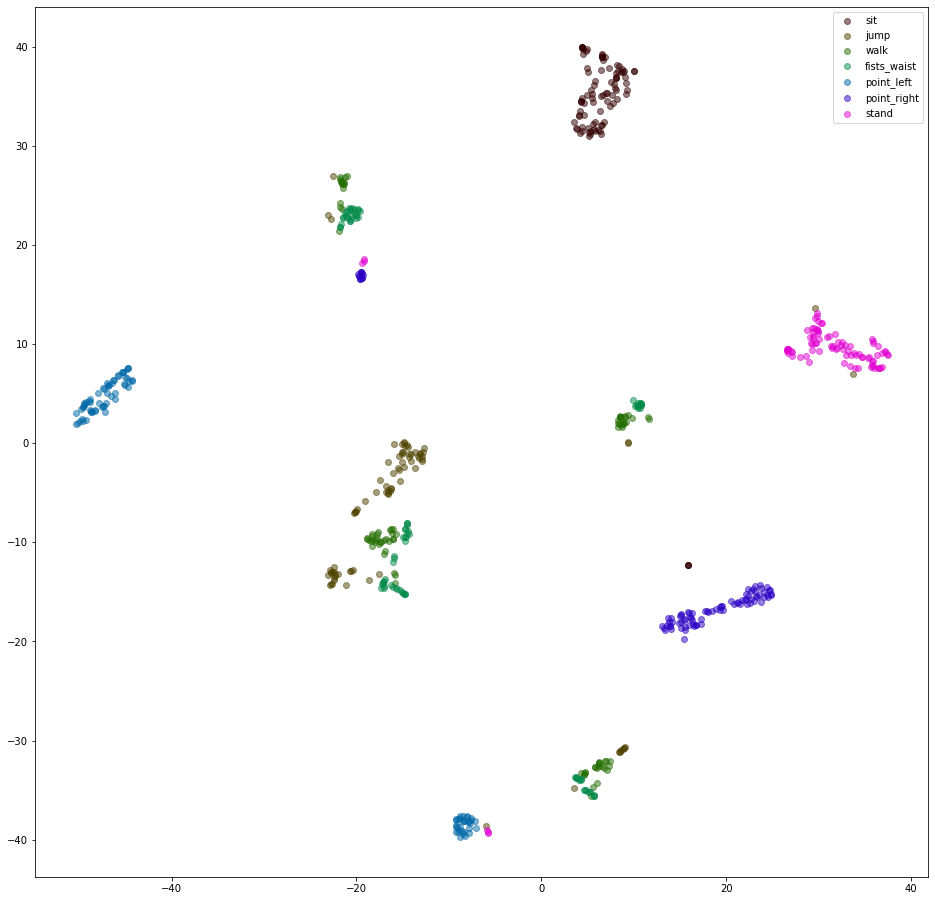

In [25]:
plt.figure(figsize=(16,16))
for i in range(len(actions)):
    mask = df_train.label.values == i
    plt.scatter(X_embedded[mask,0], X_embedded[mask,1], alpha=0.5, 
                c=c[i].reshape(1,4), 
                label=actions[i])

plt.legend()